##  Abre el archivo de datos y estudia la información general 

In [1]:
# Se importan las librerias que se usaran 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math
import seaborn as sns

In [2]:
#Se abre el archivo
games=pd.read_csv('/datasets/games.csv')

In [3]:
# Imprime la información general/resumida sobre el DataFrame de los juegos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusiones preliminares 

platform, NA_sales,EU_sales, JP_sales y Other_sales no tienen datos ausentes. De la columna names hay 2 datos ausentes, y de las demás columnas tiene varios datos ausentes, se debe revisar si es posible reemplazarlos o ver que tienen e común estos datos ausentes. La columna de year of realease se puede cambiar a int ya que no hay años con decimales. User_score esta de tipo object se debe cambiar a tipo float.

##  Prepara los datos

In [4]:
#Reemplaza los nombres de las columnas a minúsculas
games.columns=games.columns.str.lower()

In [5]:
#Mirar si hay filas duplicadas
games.duplicated().sum()


0

In [6]:
#Se ponen todos los nombres de los juegos en minúsculas 
games['name']=games['name'].str.lower()

In [7]:
#se revisa los datos ausentes de la columna nombre 
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


De estos dos juegos no se sabe el nombre y se observa que las ventas fueron mut bajas, y no se tinen información sobre los demás datos, por lo que se eliminan.

In [8]:
#Eliminar filas donde name es NaN
games=games.dropna(subset=['name'])

In [9]:
#ver cuantas plataformas hay
games['platform'].nunique()

31

Hay 31 plataformas

In [10]:
#Convierte year_of_release a int
games['year_of_release']=games['year_of_release'].astype('Int64')

In [11]:
#mirar los datos en el que year_of_release son nulos
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se observa que hay unos juegos donde tienen el año en el nombre. Entonces en algunos casos se puede obtener el año de la columna name. De los demás juegos como no hay datos que nos ayuden a saber cual es el año en que lo sacaron, se dejan como valores nulos.

In [12]:
import re
for item, frame in games['year_of_release'].iteritems():
    if pd.isna(frame):
        try:
            year=int(re.search(r'\d+', games.name[item]).group())
            if year<1111:
                year=games.year_of_release[item]
    
        except:
            year=games.year_of_release[item]
        games.year_of_release[item]=year

In [13]:
# Se cambia el tipo de user_code de object a float y los valor tbd se cambia a NaN
games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')

In [14]:
#ver cuantos valores nulos hay en critic y user score
games[['critic_score','user_score']].isna().sum()

critic_score    8576
user_score      9123
dtype: int64

In [15]:
#Calcular las ventas totales 

games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

### Conclusion parte 2

Se elimino las filas que no tenían nombre del juego, ya que no tenían información relevante. Se observo que no hay duplicados en el dataframe. También se observo que la columna nombre tiene unos datos repetidos pero es porque el juego se saco para diferentes plataformas, por lo tanto son datos únicos. 

La columna años tenía varios valores auscentes, habían unos juegos que tenía el dato del año en su nombre, por lo que se sustituyo el valor del año para los que tenían esta información. Los demás juegos con ao ausente se dejaron así ya que no hay datos para saber esta información. Y también se le cambio el tipo de float a int. 

Los datos auscente en critics_score y user_score no se sustituyeron ya que no hay información sobre esto y puede que estos juego nunca hayan recibido critica por lo que también se puede analizar más adelante como afecta las ventas de un juego cuando no hay evaluciones por parte de los criticos o de los usuarios. Los datos de user_score se cambian a float, y los valores que tienen tbd se ponen como nan porque igualmente no se tiene información sobre esta puntuación.


## Análiza los datos

### Calcular cuantos juegos fueron lanzados cada año

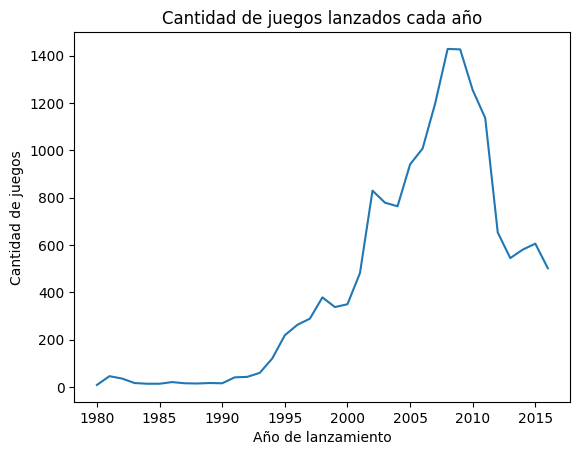

In [16]:
#Se reaaliza un gráfico para visualizar cuantos juegos fueron lanzados en cada año
counts = games["year_of_release"].value_counts().sort_values(ascending=False)
sns.lineplot(data=counts, x=counts.index, y=counts.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.title('Cantidad de juegos lanzados cada año')
plt.show()

Del anterior grafico, se puede observar que a partir del año 1995 fue que empezo a haber un incremento en la cantidad de juego que salían al mercado. A partir del 2005 hubo un incremento significativo en cuantos juegos sacaban al año. El año 2008 y 2009 fueron en donde salieron al mercado más videojuegos. Sin embargo en el 2010 se redujo mucho la cantidad de juegos lanzados. 

Los datos que se tienen de antes del 2001 no son significativos ya que en esta época anualmente no se lanzaban muchos videojuegos, además desde este año ha cambiado mucho la tecnologia y la capacidad de las personas de tener las cosas necesarias para poder jugar. Estos datos no aportan mucho por lo que se puede no tomar en cuenta para el análisis. 

### Identificar cuales son las plataformas con mayores ventas

In [17]:
# identificar cuantos juegos se han lanzado en cada plataforma
games_per_platform=games[['platform']].value_counts().rename('num_game_release')

#Identificar las ventas totales por plataforma
sales_per_platform=games.groupby('platform')[['platform','na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum('total_sales').sort_values(by='total_sales', ascending=False)

# Merge la serie en un dataframe
game_platform_sales=sales_per_platform.merge(games_per_platform, how='left', on ='platform').reset_index()

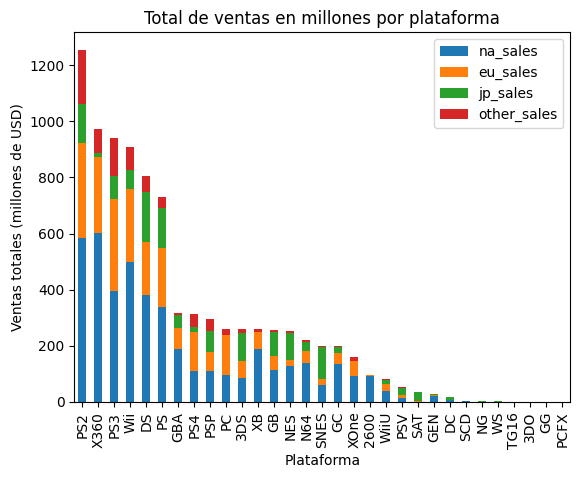

In [18]:
game_platform_sales.plot(x="platform", y=['na_sales','eu_sales','jp_sales','other_sales'], kind="bar", stacked=True,title='Total de ventas en millones por plataforma',xlabel='Plataforma',ylabel= 'Ventas totales (millones de USD)')
plt.show()

Del gráfico se observa que PS2 es el que ha tenido muchas más ventas comparado con las demás plataformas. Luego se observa que hay un grupo de 5 plataformas, desde x360 a PS, en el que las ventas van de 1000 millones a 700 millones de dólares. Después de PS hay una gran caída a menos de 400 millones en ventas para GBA. También se observa que la mayoría de las ventas se dan en Norte América y otra gran parte en Europa.

Se eligen las plataformas que tienen mayores ventas totales para construir una distribución con base en los datos de cada año. Se realiza un gráfico de líneas para la plataforma ps2 a ps que son las que más ventas tienen, para ver la distribución basada en los datos de cada año.


In [19]:
# Agrupa por plataforma y por año
platform_year=games.groupby(['platform','year_of_release'] ,as_index=False).sum()

In [20]:
#Se hace un filtro cogiendo solo las plataformas que más ventas tienen 
famous_platforms=['PS2','X360','PS3','Wii','DS','PS']
best_sale=platform_year[platform_year['platform'].isin(famous_platforms)]

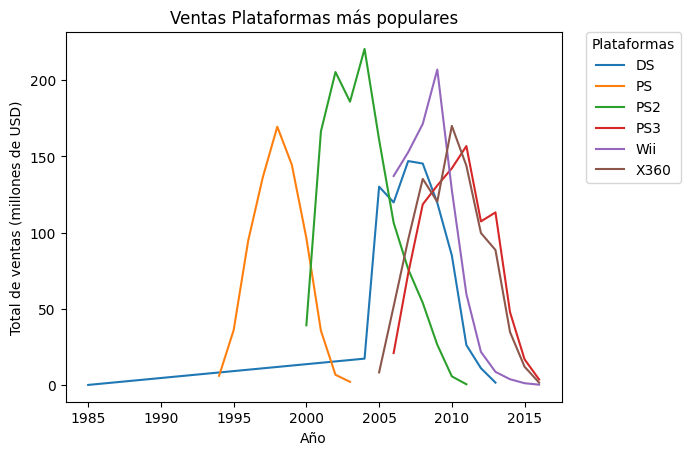

In [21]:
sns.lineplot(data=best_sale, x="year_of_release", y="total_sales",hue="platform")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Plataformas')
plt.title('Ventas Plataformas más populares')
plt.xlabel('Año')
plt.ylabel('Total de ventas (millones de USD)')
plt.show()

Las plataformas más famosas son PS2,X360,PS3,Wii,DS,PS. PS tuvo un gran pico de ventas en el 1998 y después de esto las venta bajon mucho, cuando las ventas de ps bajaron las de PS2. La baja de PS se puede deber a que salio al mercado una nueva versión de esta consola, que vendría con mejoras, por lo que las personas compraran más juegos de esta nueva plataforma. Se ve que cuando las ventas de una plataforma empieza a bajar es porque sale al mercado una nueva plataforma. 

### Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

In [22]:
#Se seleccionan solo los datos que estan después del 2004
games_after_2004=platform_year[platform_year['year_of_release']>=2004]

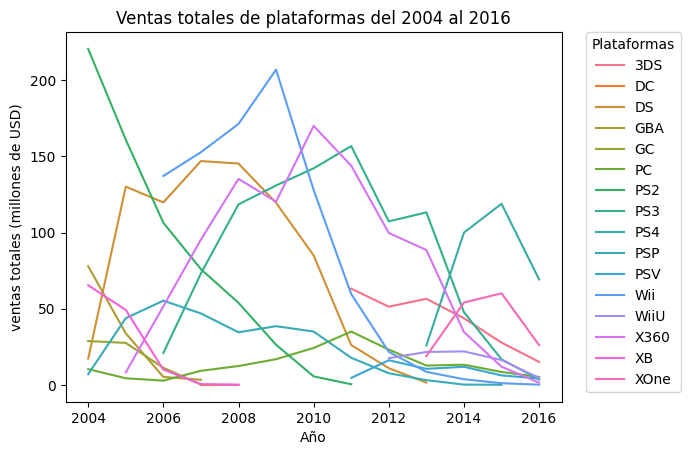

In [23]:
#Se realiza un gráfico de lineas para ver las ventas de las plataformas a través de los años 
sns.lineplot(data=games_after_2004, x="year_of_release", y="total_sales",hue="platform",palette='husl')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Plataformas')
plt.xlabel('Año')
plt.ylabel('ventas totales (millones de USD)')
plt.title('Ventas totales de plataformas del 2004 al 2016')
plt.show()

Se hizo el gráfico desde el año 2004 ya que los años anteriores a este son ya muy antiguos y la cantidad de plataformas que existen y salen al mercado es muy diferente. De este periodo se observa que en entre el año 2004 y 2006 salió una nueva plataforma cada año. Después hubo un periodo, del 2007 al 2010 en el que no salieron nuevas plataformas y luego en el 2011 sacaron dos nuevas plataformas al mercado, luego hasta el 2013 volvieron a salir dos nuevas plataformas. Por otro lado, se observa que hay plataforma que nace en el 2004 y ya en el 2013 no tiene ventas registradas, y hay otra que nace en el 2006 y ya para el 2014 las ventas son muy bajas, ya están saliendo del mercado, y también se observa que una que nace en el 2005 para el 2015 las ventas son demasiado bajas.

De esto se puede concluir que, en los últimos años, cada 1 o 2 dos años está saliendo al mercado al menos una plataforma nueva. Con base en el análisis se puede decir también que las plataformas que les va bien duran en el mercado entre 8 y 11 años. También se observa plataformas que han estado mucho tiempo en el mercado como lo es PC, que han tenido una cantidad de ventas muy similar en todos sus años en el mercado pero son muy bajas comparadas con las plataformas más nuevas.


### Análisis
Para hacer un modelo para el año 2017, voy tomar los datos a partir del año 2004, ya  los demás años son demaciado antiguos y no muestra la realidad del mercado hoy en día. 

Se observara cuales son las plataformas lideres en ventas en este periodo de tiempo

In [24]:
#Identificar las ventas totales por plataforma a partir del año 2004
sales_per_platform_2004=games_after_2004.groupby('platform')[['platform','na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum('total_sales').sort_values(by='total_sales', ascending=False).reset_index()

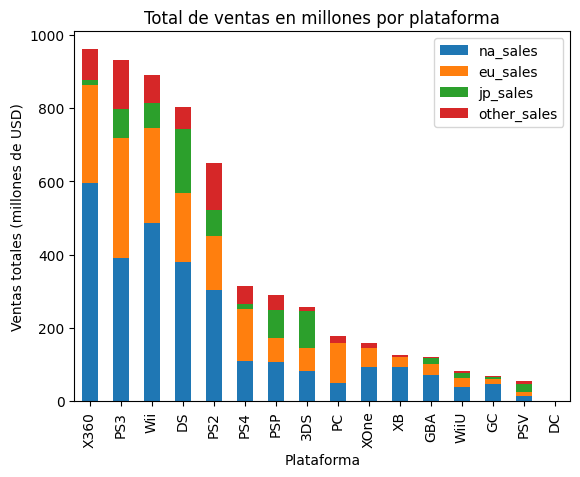

In [25]:
sales_per_platform_2004.plot(x="platform", y=['na_sales','eu_sales','jp_sales','other_sales'], kind="bar", stacked=True,title='Total de ventas en millones por plataforma',xlabel='Plataforma',ylabel= 'Ventas totales (millones de USD)')
plt.show()

Se observa que para este periodo de tiempo las plataformas que son lideres en ventas es X360, PS3, Wii, DS, PS2. De los ingresos totales en todos los años se ve que en el top 5 siguen las mismas plataformas, sin embargo, están en orden diferentes. Sumando las ventas de todos los años ps2 tiene más ventas, pero en este periodo de tiempo bajo a la plataforma N. 5 en ventas, aunque sigue vendiendo una buena cantidad, las ventas disminuyeron. Y para estos últimos años la que más vende es el X360, seguido da PS3 y Wii.

### Diagrama de caja para las ventas globales de todos los juegos

In [26]:
# dataframe con los datos que se van a usar para el análisis
games_after_2004=games[games['year_of_release']>2004]

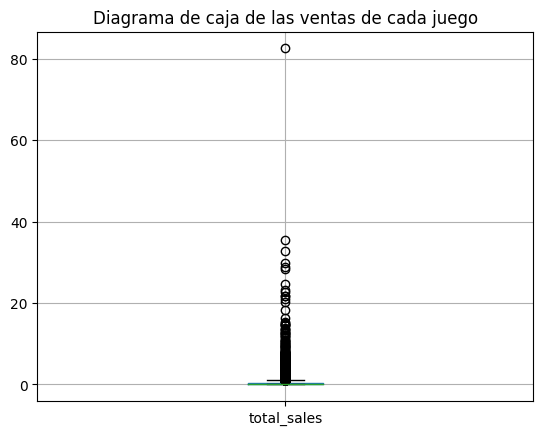

In [27]:
#Realiza un diagrama de caja de las ventas de cada juego
boxplot = games_after_2004.boxplot(column='total_sales')
plt.title('Diagrama de caja de las ventas de cada juego')
plt.show()

In [28]:
mean=games_after_2004['total_sales'].mean()
print(f'La media de los datos es: {mean}')

La media de los datos es: 0.4839195178159901


Este diagrama de caja no es muy informativo, ya que no se puede observar cual es el percentil 25%, el percentil 50%(mediana) ni el percentil 75%. Esto se debe a que hay un juegos que tuvo ventas muy altas, se vendio más de 80 millones. 

Para poder visualizar mejor la información se eliminan estos datos. Por consiguente se filtraran los datos, para juegos que tengan menos de 1 millón de vetas teniendo en cuenta de que la media de los datos es de casi 500.000 dolares.

In [29]:
filtered_data= games_after_2004[games_after_2004['total_sales']<= 1.00]

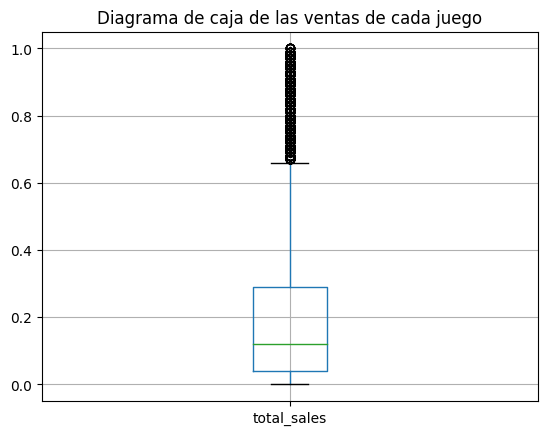

In [30]:
filtered_data.boxplot(column='total_sales')
plt.title('Diagrama de caja de las ventas de cada juego')
plt.show()

Con los datos filtrados se realiza un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

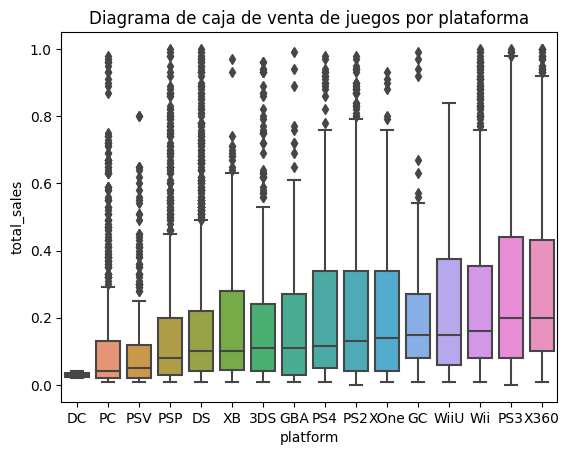

<Figure size 2000x1000 with 0 Axes>

In [31]:
#Se ordena las plataformas por la media de menor a mayor 
order = filtered_data.groupby(by=["platform"])["total_sales"].median().sort_values().index

sns.boxplot(data=filtered_data,x='platform',y='total_sales',order=order)
plt.title('Diagrama de caja de venta de juegos por plataforma')
plt.figure(figsize=(20, 10))
plt.show()

#### Conclusiones

Se observa para este periodo que la plataforma DC ya estaba saliendo del mercado por lo cual las ventas son muy bajas. También, que los juegos que más ventas han tenido es el de la plataforma X360, sin embargo, han tenido una cantidad de ventas muy similares con PS3. también se puede decir que hay varios juegos de ps3 que han tenido ventas muy grandes. Las ventas de los juegos de PS4, PS2 y xone son muy similares.

### cómo las reseñas de usuarios y profesionales afectan las ventas de las plataformas

Se escoge la plataforma que más ventas tiene, que es X360 y se calcula la correlación entre las reseñas y las ventas

In [32]:
x360=filtered_data[filtered_data['platform']=='X360']
x360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.102146,0.127637,-0.112134,-0.001122,-0.023994,-0.209892,-0.023913
na_sales,-0.102146,1.000000,0.375865,-0.008540,0.814122,0.414364,0.195912,0.895937
eu_sales,0.127637,0.375865,1.000000,0.060375,0.784072,0.339446,0.169551,0.741214
jp_sales,-0.112134,-0.008540,0.060375,1.000000,0.049130,0.143764,0.157549,0.100642
other_sales,-0.001122,0.814122,0.784072,0.049130,1.000000,0.445578,0.219735,0.962852
critic_score,-0.023994,0.414364,0.339446,0.143764,0.445578,1.000000,0.634165,0.475908
user_score,-0.209892,0.195912,0.169551,0.157549,0.219735,0.634165,1.000000,0.236132
total_sales,-0.023913,0.895937,0.741214,0.100642,0.962852,0.475908,0.236132,1.000000


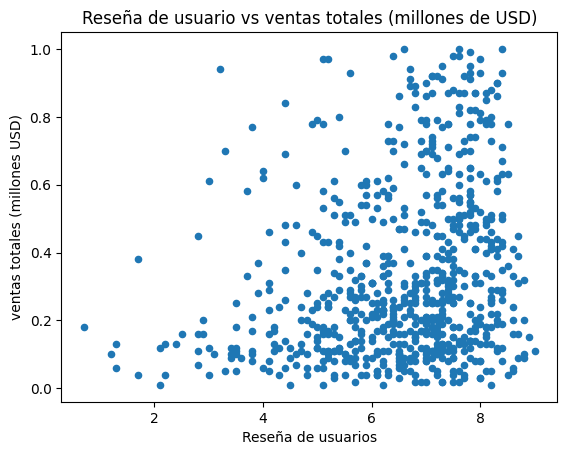

In [33]:
#Grafico de dispersión 
x360.plot(x='user_score', y='total_sales', kind='scatter', title='Reseña de usuario vs ventas totales (millones de USD)', xlabel= 'Reseña de usuarios', ylabel='ventas totales (millones USD)')
plt.show()

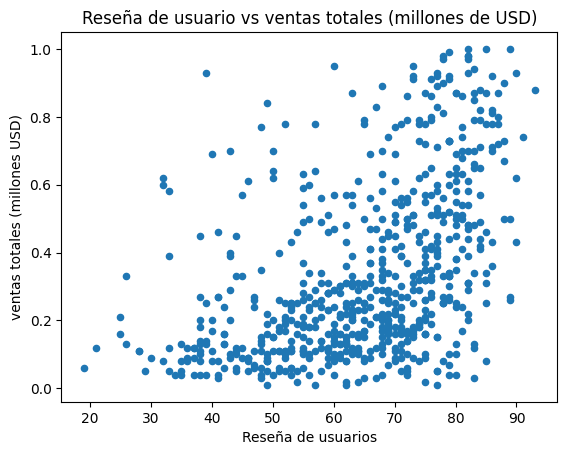

In [34]:
#Grafico de dispersión de reseña de críticos
x360.plot(x='critic_score', y='total_sales', kind='scatter',title='Reseña de usuario vs ventas totales (millones de USD)', xlabel= 'Reseña de usuarios', ylabel='ventas totales (millones USD)')
plt.show()

De los gráficos de dispersión se puede ver que para los juegos que tienen una puntuación baja, las ventas son bajas, pero cuando la puntuación es alta hay juegos con ventas altas y bajas, esto puede ser porque hay géneros de juegos que no son tan populares por lo que no muchas personas compran sin importar que este tenga una puntuación alta. Otro punto que también puede influir en esto es el rating de cada juego.

También se puede ver que hay mayor correlación entre las reseñas de los críticos y las ventas totales, tienen unan correlación 0.47 mientras que las reseñas de los usuarios con las ventas totales es de 0.24 aproximadamente.


### Se comparan las ventas de los mismo juegos en diferentes plataformas

Para este punto se va a escoger cuales son los juegos que más venden, y luego se compararan las ventas de estos juegos en las diferentes plataformas.

In [76]:
#Agrupar por nombre
name_group=filtered_data.groupby('name')[['name','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum('total_sales').sort_values(by='total_sales', ascending=False).reset_index()
top_5_name=name_group.head(5)

#Se ponen los nombres de los juegos en una lista
name_list=top_5_name['name'].tolist()

#Dataframe con los juegos con más ventas 
top_games_name=filtered_data[filtered_data['name'].isin(name_list)]

In [104]:
grouped=top_games_name.groupby(['name','platform'])['total_sales'].sum().reset_index()

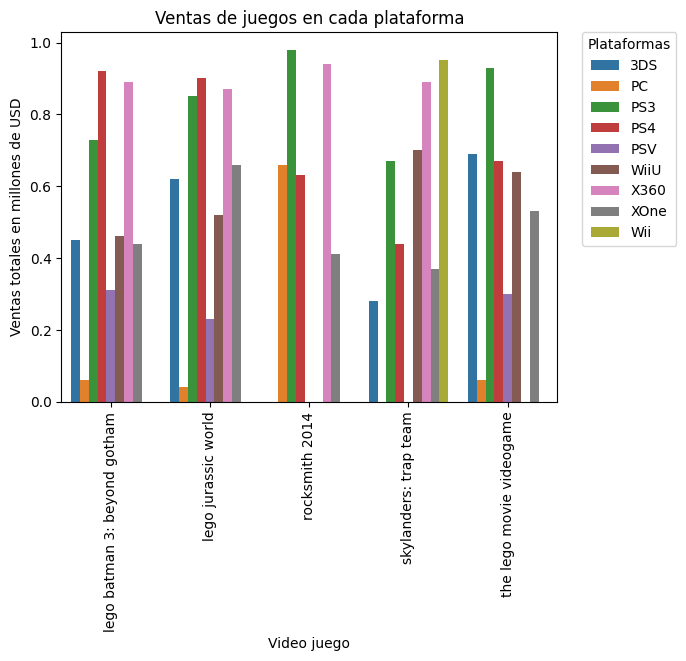

In [109]:
sns.barplot(data=grouped, x="name", y="total_sales",hue="platform")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Plataformas')
plt.xticks(rotation=90)
plt.title('Ventas de juegos en cada plataforma')
plt.xlabel('Video juego')
plt.ylabel('Ventas totales en millones de USD')
plt.show()

#### conclusiones
se ve de los juegos más vendidos la plataforma PC no vende mucho, Las plataformas que en la mayoria de los juegos vende más es PS3, PS4 y X360. De los top de los juegos la plataforma wii solo se ve que tiene ventas para un juego, skylanders. Lso demás de los juegos más vendidos no estan para esta plataforma. 

### Distribución general de los juegos por género

In [39]:
#Identificar las ventas totales por genero
sales_per_genre=filtered_data.groupby('genre')[['genre','na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum('total_sales').sort_values(by='total_sales', ascending=False)
sales_per_genre=sales_per_genre.reset_index()

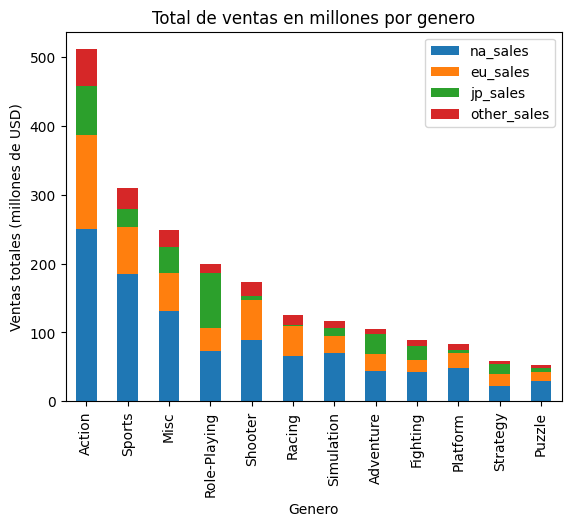

In [40]:
sales_per_genre.plot(x="genre", y=['na_sales','eu_sales','jp_sales','other_sales'], kind="bar", stacked=True,title='Total de ventas en millones por genero',xlabel='Genero',ylabel= 'Ventas totales (millones de USD)')
plt.show()

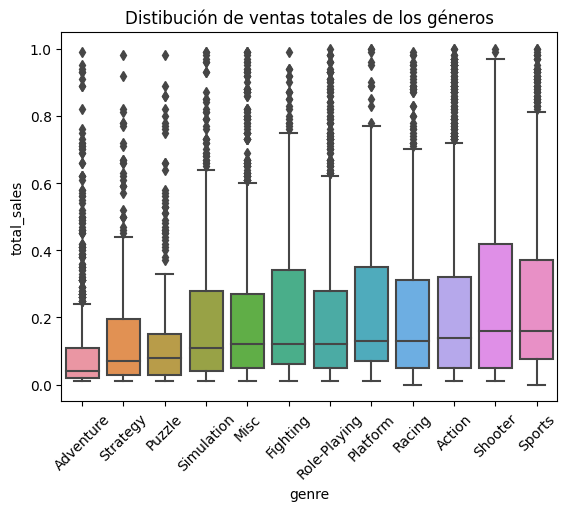

In [41]:
order = filtered_data.groupby(by=["genre"])["total_sales"].median().sort_values().index
my_plot=sns.boxplot(data=filtered_data, x='genre',y='total_sales',order=order)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.title('Distibución de ventas totales de los géneros')
plt.show()

In [42]:
filtered_data['genre'].value_counts()

Action          2294
Misc            1252
Sports          1219
Adventure       1042
Role-Playing     952
Shooter          654
Simulation       589
Racing           560
Strategy         411
Fighting         397
Puzzle           379
Platform         358
Name: genre, dtype: int64

#### Conclusiones

El género de acción vende mucho más que los demás géneros, tiene ventas por más 500 millones de dólares, esto puede ser porque hay más del doble de juegos de este género que el de deporte que es el segundo que más vende. El segundo tipo de juego que más vende es el de deportes, comparado con las ventas de los juegos de acción es mucho más baja, tiene un poco más de 300 millones de dólares en ventas.

Con respecto a la distribución se observa que un juego de género shooter es uno de los que más vende junto con los de deportes. y después de estos dos los que más vende es el de acción. Y los juegos que menos ventas tienen son los de aventura y puzzle. También se observa que hay para todos los géneros hay valores atípicos, por lo que quiere decir que hay juegos de todos los géneros que si se venden mucho.


## Crea un perfil de usuario para cada región

In [43]:
#Las 5 plataformas principales de Norte América
na_platform=filtered_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

#Las 5 plataformas principales de Europa
eu_platform=filtered_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

#Las 5 plataformas principales de japon
jp_platform=filtered_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

print('Las 5 plataformas principales en América')
print(na_platform)
print()
print('Las 5 plataformas principales en Europa')
print(eu_platform)
print()
print('Las 5 plataformas principales en Japón')
print(jp_platform)

Las 5 plataformas principales en América
  platform  na_sales
0       DS    196.01
1     X360    180.57
2      Wii    179.11
3      PS3    136.16
4      PS2     94.47

Las 5 plataformas principales en Europa
  platform  eu_sales
0      PS3     92.37
1     X360     76.51
2       PC     64.42
3      Wii     57.36
4       DS     45.57

Las 5 plataformas principales en Japón
  platform  jp_sales
0       DS     68.60
1      PSP     56.72
2      PS3     45.10
3      PS2     38.24
4      3DS     37.74


In [44]:
#se pone en una lista las top 5 plataformas de cada región 
lista_na=na_platform['platform'].tolist()
lista_eu=eu_platform['platform'].tolist()
lista_jp=jp_platform['platform'].tolist()
#Se juntan en una lista final los top 5 de cada región
lista_top=lista_na+lista_eu+lista_jp
lista_top=np.unique(lista_top)

In [45]:
#Se hace un dataframe con las plataformas top y las ventas de cada región 
df_top_platforms=filtered_data[filtered_data['platform'].isin(lista_top)]
dicc={'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}
top_platforms_region=df_top_platforms.groupby('platform')
top_platforms_region=top_platforms_region.agg(dicc).reset_index()

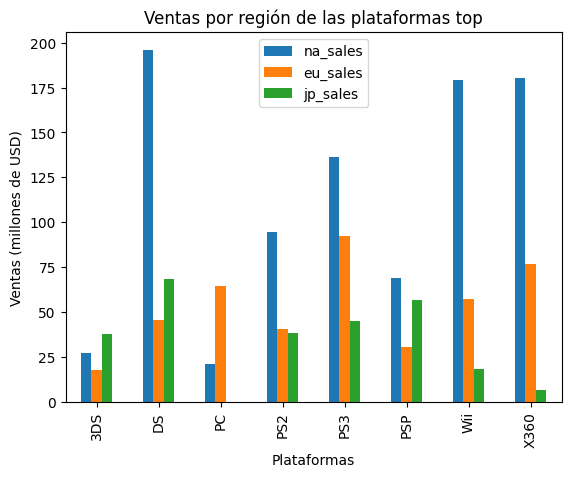

In [46]:
# Se realiza un gráfico de barras
top_platforms_region.plot(x='platform',kind='bar', title='Ventas por región de las plataformas top', xlabel='Plataformas', ylabel='Ventas (millones de USD)')
plt.show()

#### Conclusiones

Se tiene que el top 1 de la plataforma en América y Japón es DS, sin embargo, se ve que en América la cantidad de ventas es mucho mayor que en japón, en cambio la diferencia que tiene con las cantidades de ventas en Europa es mucho menor y en Europa esta plataforma está en puesto número 5 de cantidad de ventas. Se observa que América es la que más ventas tiene en casi todas las plataformas, excepto por pc la cuál es el top 3 de Europa, mientras que en japón no hay registro de ventas de esta plataforma. En la mayoría de plataformas exceptuando por tres (3DS, DS Y PSP) japón es el que registra menos ventas comprado con las otras regiones. Se ve que 3DS es más usada en japón que en las otras regiones. También se ve que el más top de Europa es PS3.

### Los 5 géneros principales para cada región

In [47]:
#Las 5 plataformas principales de Norte América
na_genre=filtered_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

#Las 5 plataformas principales de Europa
eu_genre=filtered_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

#Las 5 plataformas principales de japon
jp_genre=filtered_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

print('Los 5 géneros principales en América')
print(na_genre)
print()
print('Los 5 géneros principales en Europa')
print(eu_genre)
print()
print('Los 5 géneros principales en Japón')
print(jp_genre)

Los 5 géneros principales en América
          genre  na_sales
0        Action    249.97
1        Sports    184.45
2          Misc    131.31
3       Shooter     88.42
4  Role-Playing     73.21

Los 5 géneros principales en Europa
     genre  eu_sales
0   Action    136.86
1   Sports     68.66
2  Shooter     58.20
3     Misc     54.51
4   Racing     42.24

Los 5 géneros principales en Japón
          genre  jp_sales
0  Role-Playing     79.30
1        Action     70.66
2          Misc     37.75
3     Adventure     28.26
4        Sports     26.38


In [48]:
# se hace una lista con los 5 generos principales de cada región
lista_na_genre=na_genre['genre'].tolist()
lista_eu_genre=eu_genre['genre'].tolist()
lista_jp_genre=jp_genre['genre'].tolist()
#Se juntan en una lista final los top 5 de cada región
lista_top_genre=lista_na_genre+lista_eu_genre+lista_jp_genre
lista_top_genre=np.unique(lista_top_genre)

In [49]:
#Se hace un dataframe con las plataformas top y las ventas de cada región 
df_top_genre=filtered_data[filtered_data['genre'].isin(lista_top_genre)]
dicc={'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}
top_genre_region=df_top_genre.groupby('genre')
top_genre_region=top_genre_region.agg(dicc).reset_index()

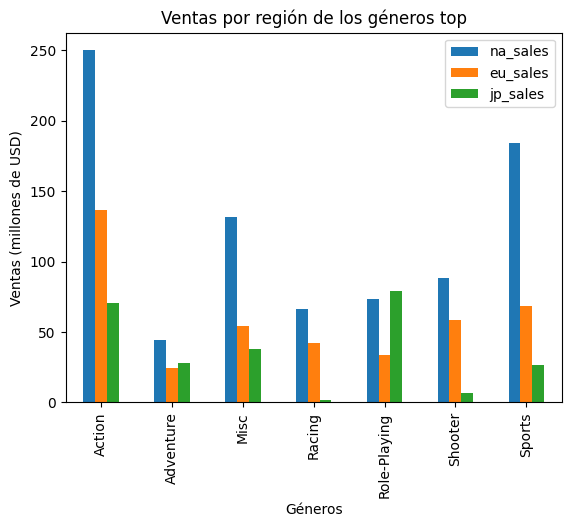

In [50]:
# Se realiza un gráfico de barras
top_genre_region.plot(x='genre',kind='bar', title='Ventas por región de los géneros top', xlabel='Géneros', ylabel='Ventas (millones de USD)')
plt.show()

#### Conclusiones

En América y Europa los géneros top 4 son los mismos, que son : acción, deporte, misc, shooter. El 5 más famoso si cambia para estas dos regiones siendo role-play en América y Racing en Europa. Sin embargo, se observa que para estos 4 géneros las ventas en América siempre son mayores en América. En japón el género más top es role-playing, en este es la región que más ventas tiene, seguido de América, y el segundo más comprado en japón es de acción.

### Ver como las clasificaciones de ESRB afectan las ventas en cada región

In [51]:
#Ventas por rating en cada región 
na_rating=filtered_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
eu_rating=filtered_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
jp_rating=filtered_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()

rating_sales=na_rating.merge(eu_rating,on='rating')
rating_sales=rating_sales.merge(jp_rating, on='rating')

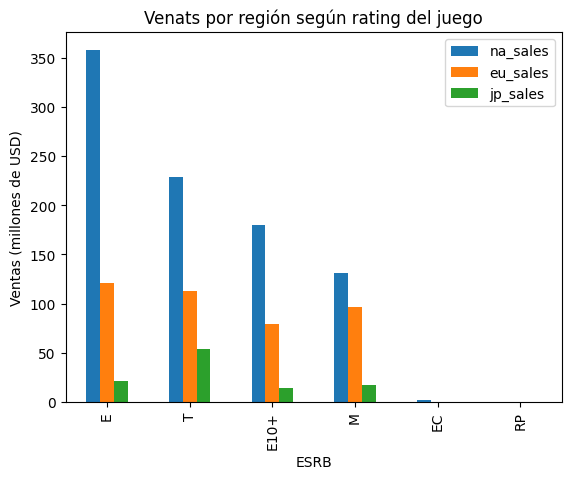

In [52]:
rating_sales.plot(x='rating',kind='bar', title='Venats por región según rating del juego', xlabel='ESRB', ylabel='Ventas (millones de USD)')
plt.show()

#### Conclusiones

En América y Europa se tuvo más ventas cuando tiene la clasificación E y menos ventas con la clasificación M. Para estas dos regiones las ventas se ven afectadas de igual manera con cada clasificación. Mientras que para japón tuvo más ventas los juegos con clasificación T, y la clasificación afecta de manera diferentes las ventas comparada con las otras dos regiones.


## Pueba de hipótesis

### Probar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Para este caso vamos a establecer una hipótesis nula y alternativa.

**Hipótesis nula:** Las clasificaciones promedio de los usuarios son iguales para las plataformas Xbox One y PC. 

**Hipótesis alternativa:** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

**Umbral alpha=** 5%

Se hace el analisis de esto como una hipótesis sobre la igualdad de las medias de dos poblaciones

In [53]:
alpha=0.05

sample1=filtered_data[filtered_data['platform']=='XOne']['user_score'].dropna()
sample2=filtered_data[filtered_data['platform']=='PC']['user_score'].dropna()

results=st.ttest_ind(sample1,sample2, equal_var=False)

#impirmir el valor p
print('valor p:', results.pvalue)


#compara los valores p obtenidos con el nivel de significación estadística):
if results.pvalue<alpha:
    print('Rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis')

valor p: 0.007376138751005177
Rechaza la hipótesis nula


### Probar  si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**Hipótesis nula:** Las clasificaciones promedio de los usuarios son iguales para los géneros de acción y deporte. 

**Hipótesis alternativa:** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**Umbral alpha=** 5%

Se hace el analisis de esto como una hipótesis sobre la igualdad de las medias de dos poblaciones

In [54]:
alpha=0.05

sample1=filtered_data[filtered_data['genre']=='Action']['user_score'].dropna()
sample2=filtered_data[filtered_data['genre']=='Sports']['user_score'].dropna()

results=st.ttest_ind(sample1,sample2, equal_var=False)

#impirmir el valor p
print('valor p:', results.pvalue)


#compara los valores p obtenidos con el nivel de significación estadística):
if results.pvalue<alpha:
    print('Rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis')

valor p: 6.796251239329197e-06
Rechaza la hipótesis nula


## Conclusiones

Primero se cargo el archivo y se revisaron los datos, se observo que platform, NA_sales,EU_sales, JP_sales y Other_sales no tienen datos ausentes. De la columna names hay 2 datos ausentes, y no tenían mcuha información por lo que se elimino estas filas, y de las demás columnas tiene varios datos ausentes. Algunos valores ausentes del año se reemplazaron cuando tenían el año en el nombre, los demás datos se dejaron como nulos.  Y también se le cambio el tipo de float a int. Los datos ausente en critics_score y user_score no se sustituyeron ya que no hay información sobre esto . Los datos de user_score se cambian a float, y los valores que tienen tbd se ponen como nan porque igualmente no se tiene información sobre esta puntuación.

primero se realizo un analisis preliminar con todos los datos, se observo que al principio habían muy pocas plataformas, por lo tanto no salian gran cantidad de video juegos la mercado, a partir del 2005 es que hubo un gran incremento de video juegos que salian al mercado, por lo que se hizo el resto del analisis a partir del 2004 que es cuando se dio el incremento y también habían varias plataformas en el mercado, esto se debe al avance tecnológico que ocurrio en esta época y la facilidad de las personas de tener los elementos que se necesitan para poder jugar. 

Comparando las ventas en todas las regiones (América, Europa, Japón y otras) se observo que la mayoria de las ventas se dan en América y donde hay menos ventas es en Japón y hay muy pocas ventas en otras partes. Se vio que a partir del 2004 salian al mercado mas o menos dos plataformas cada dos años, hubieron plataformas que se quedaron en el mercado por mucho tiempo y otras que no duraron mucho, una de las que más duro en el mercado es ps2. Las platafomras que les va bien duran en el mercado entre 8 y 11 años. 

Las plataformas lideres en ventas son: X360, PS3, Wii, DS, PS2. Por otro lado, se puede concluir que cuando los video juegos tienen una puntuación baja las vendas son malas, pero cuando tiene puntuación alta hay juegos que les va bien y otros que no, esto se puede deber a que hay juegos de géneros o clasificaciones que no ha mucha gente le gusta pero tienen una alta puntuación, por lo que no hay muchas ventas. El género de acción es el que más vende en América y Europa, y por esta razón debe ser que hay muchos más juegos en el mercado de este género que de los demás, y por lo tanto es el género que más se vende. 
Los generos más famosos son acción, deporte, misc, shooter.

De las pruebas de hipótesis podemos concluir que las reseñas de los usuarios para los juegos de Xbox One y PC son diferentes, esto puede ser por que las ventas de PC son mucho menores que las de Xbox One. Por otro lado concluye que la reseñas de los usuarios para los géneros de acción y deportes son diferentes.